# SCI with transverse motion with precomputed Bragg table

In [1]:
import numpy as np
from mwave.precompute import load_fast_bragg_evaluator
from mwave.geometry import cloud_to_scrbi_ellipse_xy
from matplotlib import pyplot as plt

In [2]:
np.random.seed(13703599)

npoints = 100000
x0 = np.random.randn(npoints)*0.75e-3
y0 = np.random.randn(npoints)*0.75e-3
z0 = np.random.randn(npoints)*0.75e-3
v0 = np.random.randn(npoints)*0.35e-3
vx = np.random.randn(npoints)*3.5e-3*1.8
vy = np.random.randn(npoints)*3.5e-3*1.8
T = 100e-3
Tp = 10e-3
phi_c = np.linspace(0,2*np.pi)
phi_d = np.pi/4
Omega0 = 32
w0 = 10e-3

n_init = 0
n_bragg = 5
N_bloch = 10

bragglookup = load_fast_bragg_evaluator('sig0.247.h5', n_init, n_bragg, N_bloch)

def deltalookup(v, n_bragg):
    return 4*n_bragg + 4*(v/3.5e-3) # The modification to delta is 4 times the velocity defined in units of recoil velocities

def omegalookup(x, y, z):
    return Omega0*np.exp(-2*(x**2 + y**2)/(w0**2))

# (l)ocal (p)hase (lookup)
def lplookup(x, y, z):
    wavelen = 852e-9
    zR = np.pi*w0**2/wavelen
    kk = 2*np.pi/wavelen
    return kk*(x**2 + y**2)/(2*zR)

x, y = cloud_to_scrbi_ellipse_xy(x0, y0, z0, vx, vy, v0, T, Tp, n_bragg, N_bloch, np.exp(1j*phi_c), np.exp(1j*phi_d), bragglookup, omegalookup, lplookup, deltalookup)

Now plot and fit the result

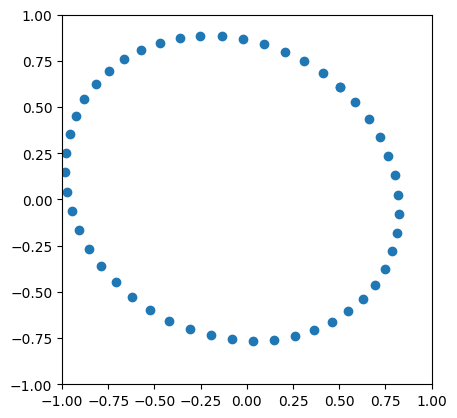

differential phase fit error=-69.106 mRad
0.9022853875626692
0.8257137521107901


In [3]:
plt.scatter(x, y)
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.gca().set_aspect('equal')
plt.show()

from alphautil.analysis import fit_ellipse_coeff
from alphautil.ellipse import get_sci_params
coeff = fit_ellipse_coeff(x, y)
bx, by, Ax, Ay, phi_d_fit = get_sci_params(coeff)

print('differential phase fit error=%0.3f mRad' % ((phi_d - phi_d_fit)*1e3))
print(Ax)
print(Ay)